<a href="https://colab.research.google.com/github/MDaniyalTariq/Urdu_Handwritten_Words_Recognition_through_CNN_Ensembling/blob/main/Urdu_Handwritten_Words_Recognition_through_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hazrat_uhat_urdu_handwritten_text_dataset_path = kagglehub.dataset_download('hazrat/uhat-urdu-handwritten-text-dataset')

print('Data source import complete.',hazrat_uhat_urdu_handwritten_text_dataset_path)


100%|██████████| 43.4M/43.4M [00:02<00:00, 19.2MB/s]

Extracting files...


Data source import complete. /root/.cache/kagglehub/datasets/hazrat/uhat-urdu-handwritten-text-dataset/versions/2


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os


In [16]:
# Load the Urdu Handwritten Text dataset
# Load the dataset
zip_file_path = '/content/uhat_dataset.npz'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    bad_file = zip_ref.testzip()
    if bad_file is None:
        print("The file is a valid zip file.")
    else:
        print(f"Corrupted file: {bad_file}")

data = np.load(zip_file_path)

# Extract digit data
x_train = data['x_chars_train']
x_test = data['x_chars_test']
y_train = data['y_chars_train']
y_test = data['y_chars_test']

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=40)
y_test = to_categorical(y_test, num_classes=40)

print("Dataset loaded and processed successfully.")


The file is a valid zip file.
Dataset loaded and processed successfully.


In [17]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(40, activation='softmax')  # 40 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,904 (894.16 KB)

 Trainable params: 228,904 (894.16 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.2496 - loss: 2.6901 - val_accuracy: 0.7508 - val_loss: 0.8474
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 44s 122ms/step - accuracy: 0.6356 - loss: 1.1636 - val_accuracy: 0.8572 - val_loss: 0.5076
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - accuracy: 0.7470 - loss: 0.7961 - val_accuracy: 0.8822 - val_loss: 0.3825
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.7923 - loss: 0.6560 - val_accuracy: 0.9047 - val_loss: 0.3055
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.8308 - loss: 0.5344 - val_accuracy: 0.9213 - val_loss: 0.2633
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8467 - loss: 0.4772 - val_accuracy: 0.9281 - val_loss: 0.2342
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.8611 - loss: 0.4340 - val_accuracy: 0.9324 - val_loss: 0.2223
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.8757 - loss: 0.

Test Accuracy: 94.92%
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       145
           1       0.97      0.97      0.97       145
           2       0.96      0.91      0.94       145
           3       0.94      0.97      0.96       145
           4       0.87      0.94      0.90       145
           5       0.97      0.92      0.95       145
           6       0.92      0.90      0.91       145
           7       0.93      0.86      0.90       145
           8       0.93      0.93      0.93       145
           9       0.90      0.95      0.93       145
          10       0.93      0.97      0.95       115
          11       0.99      0.95      0.97       110
          12       0.98      0.92      0.95       110
          13       0.96      0.96      0.96       100
          14       0.91      0.92      0.92       100
          15       0.89      0.95      0.92        95
          16     

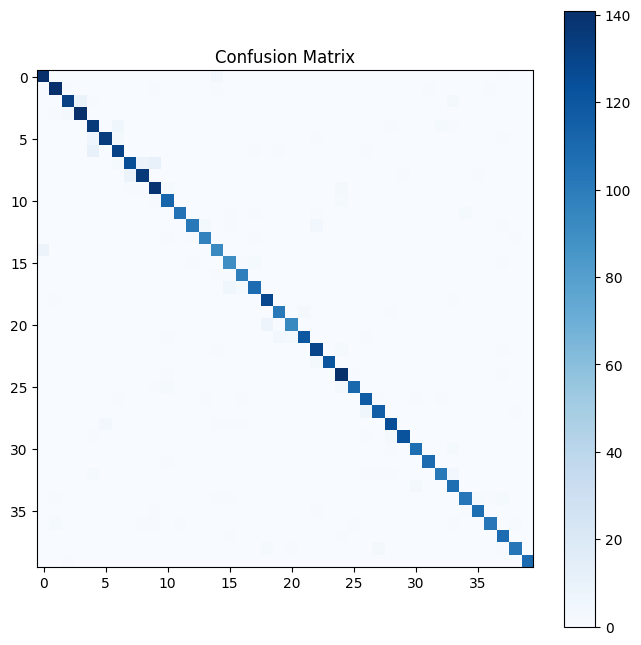

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate a classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


In [ ]:
# Save the model
model.save('urdu_digit_recognition_model.h5')
print("Model saved as urdu_digit_recognition_model.h5")


In [ ]:
# Create a link to download the trained model
from IPython.display import FileLink
FileLink('urdu_digit_recognition_model.h5')


In [ ]:
# Display one test image and its prediction for each class
for label in range(40):
    index = np.where(y_true == label)[0][0]  # Get index of the first image for the class
    test_image = x_test[index].reshape(1, 28, 28, 1)
    predicted_label = np.argmax(model.predict(test_image), axis=1)[0]

    plt.imshow(test_image.reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {label}, Predicted: {predicted_label}")
    plt.show()


In [5]:
!pip install scikeras

Ensembling is a technique in machine learning where multiple models (also called "learners") are combined to improve the overall performance of a predictive model. The idea behind ensembling is that by combining the predictions from several models, the resulting prediction will likely be more accurate and robust than the predictions of a single model.

What is Ensembling?
In ensembling, we take multiple models and combine their predictions in a way that minimizes errors and biases. The main objective is to leverage the strengths of each model and mitigate their weaknesses. There are several popular methods for ensembling:

Bagging (Bootstrap Aggregating): In this method, multiple models (typically of the same type) are trained on different subsets of the data, generated through bootstrapping (random sampling with replacement). The final prediction is made by averaging the predictions of the individual models (for regression tasks) or taking a majority vote (for classification tasks). One famous example of bagging is the Random Forest algorithm.

Boosting: In boosting, models are trained sequentially, with each model trying to correct the errors made by the previous models. The predictions are then combined in a weighted manner, with more weight given to models that perform better. Examples of boosting algorithms include AdaBoost and Gradient Boosting.

Stacking: This involves training multiple models (often of different types) and then using another model to combine their predictions. The second model, also known as the meta-model, learns how to best combine the predictions of the base models.

Voting: In the voting method, multiple models are trained independently, and their predictions are combined using a voting mechanism (either hard or soft voting). In hard voting, the class with the majority vote is selected, while in soft voting, the class with the highest probability is chosen.

Why are we using Ensembling?
Ensembling improves the accuracy and robustness of machine learning models by reducing variance and bias. Here's why it's useful:

Reduces Overfitting: By combining multiple models, ensemble methods tend to be less sensitive to the specific training data, which helps to reduce overfitting. For example, bagging methods like Random Forest are known to be less prone to overfitting compared to individual decision trees.

Improves Generalization: Combining multiple models that may have different strengths leads to better generalization on unseen data. While one model may be overfitting on certain aspects of the data, the ensemble method can balance the model's predictions and produce better results.

Handles Model Weaknesses: Each model in an ensemble may have its own strengths and weaknesses. Some models may excel in detecting certain patterns, while others might struggle. By combining them, we create a more reliable and well-rounded predictive model.

Increases Performance: Ensembling often leads to better performance compared to using a single model, especially when the models are diverse and make different types of errors.

Why am I using Ensembling?
In the context of this project, I am using ensembling to improve the performance of a classification task involving the Urdu Handwritten Text dataset. The idea is to combine the predictions of multiple Convolutional Neural Network (CNN) models, each of which may have learned different aspects of the data. By using ensembling, I aim to:

Increase the accuracy of the model by combining the predictions of multiple CNN models.
Reduce overfitting by leveraging different training sets and model architectures.
Enhance robustness by ensuring that different models can complement each other, making the overall system more reliable.
The ensemble model is a Voting Classifier that combines three different CNN models using soft voting. This technique will provide a more accurate and generalized model for recognizing handwritten Urdu characters.


In [9]:
import zipfile
with zipfile.ZipFile('/content/uhat_dataset.npz', 'r') as zip_ref:
    zip_ref.testzip()


The file is a valid zip file.
Dataset loaded and processed successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Ensemble Test Accuracy: 95.64%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       145
           1       0.99      0.97      0.98       145
           2       0.96      0.94      0.95       145
           3       0.96      0.96      0.96       145
           4       0.85      0.95      0.90       145
           5       0.97      0.97      0.97       145
           6       0.98      0.87      0.92       145
           7       0.94      0.90      0.92       145
           8       0.95      0.94      0.95       145
           9       0.95      0.95      0.95       145
          10       0.97      0.97      0.97       115
          11       0.95      0.95      0.95       110
          12       0.98      0.93      0.95       110
          13       0.93      0.97      0.95       100
          14       0.92      0.94  

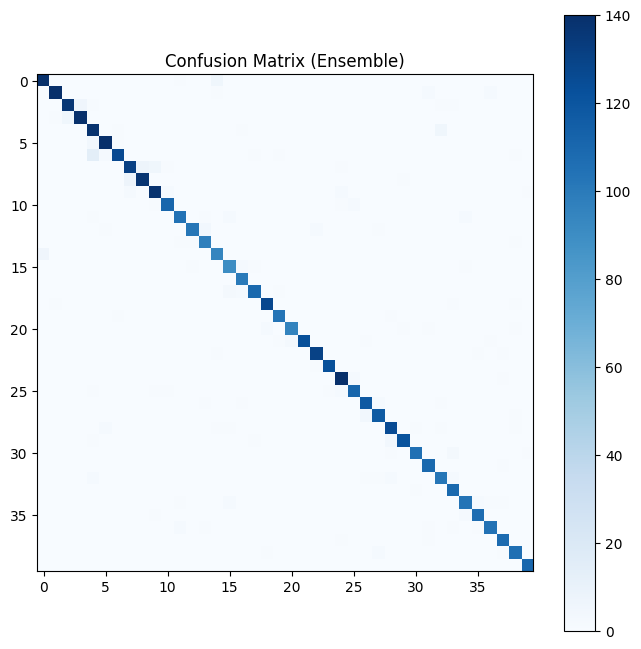

Individual models saved.


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
import zipfile

# Load the dataset
zip_file_path = '/content/uhat_dataset.npz'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    bad_file = zip_ref.testzip()
    if bad_file is None:
        print("The file is a valid zip file.")
    else:
        print(f"Corrupted file: {bad_file}")

data = np.load(zip_file_path)
x_train = data['x_chars_train']
x_test = data['x_chars_test']
y_train = data['y_chars_train']
y_test = data['y_chars_test']

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=40)
y_test = to_categorical(y_test, num_classes=40)

print("Dataset loaded and processed successfully.")

# Define function to create a CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(40, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create individual models
model1 = create_model()
model2 = create_model()
model3 = create_model()

# Train each model
model1.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
model2.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
model3.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

# Predict with each model
y_pred_1 = model1.predict(x_test)
y_pred_2 = model2.predict(x_test)
y_pred_3 = model3.predict(x_test)

# Average the predictions (soft voting)
y_pred_ensemble = np.argmax((y_pred_1 + y_pred_2 + y_pred_3) / 3, axis=1)

# Evaluate ensemble
print(f"Ensemble Test Accuracy: {np.mean(np.argmax(y_test, axis=1) == y_pred_ensemble) * 100:.2f}%")

# Generate classification report
print(classification_report(np.argmax(y_test, axis=1), y_pred_ensemble))

# Confusion matrix
conf_matrix_ensemble = confusion_matrix(np.argmax(y_test, axis=1), y_pred_ensemble)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix_ensemble, cmap='Blues')
plt.title("Confusion Matrix (Ensemble)")
plt.colorbar()
plt.show()

# Save the models
model1.save('cnn_model1.h5')
model2.save('cnn_model2.h5')
model3.save('cnn_model3.h5')
print("Individual models saved.")
